## SARIMAX Model

### 1. Import libraries and get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv("./BTC.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-12-01,10861.5
2017-12-02,10912.7
2017-12-03,11246.2
2017-12-04,11623.9
2017-12-05,11667.1
...,...
2023-06-12,25906.8
2023-06-13,25929.4
2023-06-14,25129.5


### 2. Split the data into training, test and validate sets

In [3]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [4]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [5]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


## 3. Perform SARIMAX Model

Exogenous variable

In [6]:
train_data['seasonal_index'] = train_data.index.day

C:\Users\PHUTRAN\AppData\Local\Temp\ipykernel_14392\586218167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['seasonal_index'] = train_data.index.day


### 3.1 Build the best SARIMAX Model from auto_arima

In [7]:
# SARIMAX Model
import pmdarima as pmd

SARIMAX_model = pmd.auto_arima(train_data[['Price']], 
                        exogenous=train_data[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=22299.096, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=19703.161, Time=2.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=21140.131, Time=2.78 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=22328.312, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=19981.172, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=19493.663, Time=10.43 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=17.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.70 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=22302.318, Time=4.20 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=19495.662, Time=13.34 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=19495.660, Time=16.04 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=21141.760, Time=10.59 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=23.30 sec
 ARIMA(1,0,0)(2,1,0)[12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1214
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -9742.327
Date:                            Fri, 16 Jun 2023   AIC                          19492.653
Time:                                    23:29:36   BIC                          19513.020
Sample:                                12-01-2017   HQIC                         19500.325
                                     - 03-28-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9612      0.002    410.438      0.000       0.957       0.966
ar.S.L12      -0.6834      0.013    -52.141      0.000      -0.709      -0.658
ar.S.L24      -0.4621      0.013    -34.344      0.000      -0.488      -0.436
sigma2      6.253e+05   8098.717     77.205      0.000    6.09e+05    6.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             25358.30
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.77   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.2 Evaluate on Validate data

In [8]:
def evaluate_sarimax_model(y_data):
    predictions = (SARIMAX_model.predict(n_periods=len(y_data))).values
    mse = mean_squared_error(y_data, predictions)
    mae = mean_absolute_error(y_data, predictions)
    mape = mean_absolute_percentage_error(y_data, predictions)
    rmse = mean_squared_error(y_data, predictions, squared=False)
    return predictions, mse, mae, mape, rmse

In [9]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data)
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_sarimax_model(y_val)

print("Price predict on validate data:", y_pred_val)

Price predict on validate data: [57137.98881512 55174.16754512 53335.52442547 53953.4793201
 52978.04180799 51864.87316127 52255.95286791 50979.66329572
 53546.01622223 53687.22268637 54093.18222996 53366.33956815
 54388.43558264 53489.87991731 53959.564518   54744.77810017
 55441.01612329 54800.6664133  55866.84529627 54723.22568839
 57108.80448184 56993.34474567 55750.12964832 55987.33687452
 57532.01455142 56214.58155465 56139.39365364 56511.30656494
 56172.60500504 54218.27676782 54764.16093583 53123.11222406
 53969.69935673 55668.02483491 55734.31750964 55591.79226084
 56930.22817048 55396.08472707 54616.28191039 55183.46595253
 54770.06494974 53486.11366902 54066.82375373 52695.97645545
 54669.7778449  55239.3008677  55165.22504316 54829.51317374
 56060.47934712 54861.3464526  54808.4869712  55427.04958827
 55537.03810123 54396.4417048  55188.31653769 53857.41615301
 55766.97176683 56264.93642347 55676.99214897 55644.30346401
 57039.7135018  55707.62332694 55479.57209151 55968.95

### 3.3 Evaluate on Test data

In [10]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_sarimax_model(y_test)

print("Price predict on test data:", y_pred_test)

Price predict on test data: [57137.98881512 55174.16754512 53335.52442547 53953.4793201
 52978.04180799 51864.87316127 52255.95286791 50979.66329572
 53546.01622223 53687.22268637 54093.18222996 53366.33956815
 54388.43558264 53489.87991731 53959.564518   54744.77810017
 55441.01612329 54800.6664133  55866.84529627 54723.22568839
 57108.80448184 56993.34474567 55750.12964832 55987.33687452
 57532.01455142 56214.58155465 56139.39365364 56511.30656494
 56172.60500504 54218.27676782 54764.16093583 53123.11222406
 53969.69935673 55668.02483491 55734.31750964 55591.79226084
 56930.22817048 55396.08472707 54616.28191039 55183.46595253
 54770.06494974 53486.11366902 54066.82375373 52695.97645545
 54669.7778449  55239.3008677  55165.22504316 54829.51317374
 56060.47934712 54861.3464526  54808.4869712  55427.04958827
 55537.03810123 54396.4417048  55188.31653769 53857.41615301
 55766.97176683 56264.93642347 55676.99214897 55644.30346401
 57039.7135018  55707.62332694 55479.57209151 55968.956383

### 3.4 Predict price for the next 30 days

In [11]:
last_index = len(df)
date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = (SARIMAX_model.predict(n_periods=len(x_next_30_days))).values

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[57137.98881512 55174.16754512 53335.52442547 53953.4793201
 52978.04180799 51864.87316127 52255.95286791 50979.66329572
 53546.01622223 53687.22268637 54093.18222996 53366.33956815
 54388.43558264 53489.87991731 53959.564518   54744.77810017
 55441.01612329 54800.6664133  55866.84529627 54723.22568839
 57108.80448184 56993.34474567 55750.12964832 55987.33687452
 57532.01455142 56214.58155465 56139.39365364 56511.30656494
 56172.60500504 54218.27676782]


### 4.  Evaluate accuracy validate, test data

In [12]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

df = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(df)


                   MSE           MAE      MAPE          RMSE
Validate  1.063689e+09  32299.680233  1.499791  32614.244078
Test      1.657067e+08  11299.816367  0.278596  12872.711410


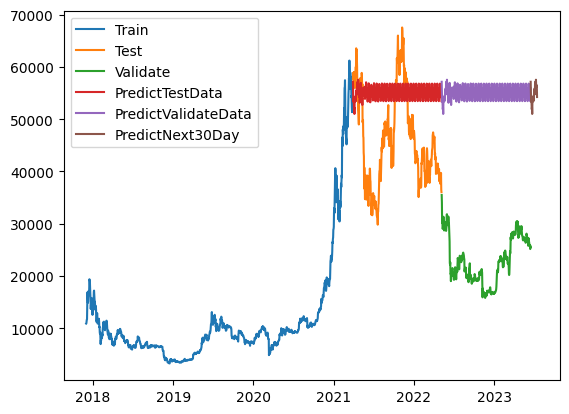

In [13]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(date_range, y_next_30_days)

plt.legend(['Train', 'Test', 'Validate','PredictTestData', 'PredictValidateData','PredictNext30Day'])
plt.show()